In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [3]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

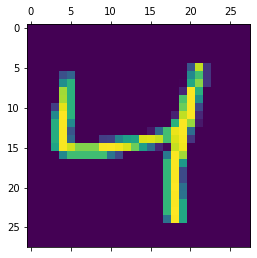

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train.reshape(len(X_train),28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape


(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4718 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9250


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.9244


[0.2689092457294464, 0.9243999719619751]

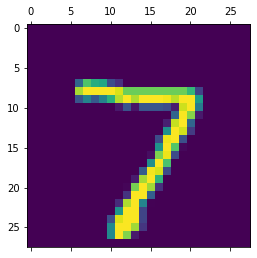

In [17]:

plt.matshow(X_test[0])

In [18]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 956us/step


array([1.8747095e-02, 2.6613264e-07, 5.7768911e-02, 9.5038092e-01,
       2.5087630e-03, 8.7751441e-02, 1.3550977e-06, 9.9978405e-01,
       9.8551326e-02, 7.5243765e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    5,    2,    3,    0],
       [   0, 1105,    4,    2,    0,    1,    4,    2,   17,    0],
       [   3,    9,  928,   18,    7,    2,   12,   10,   38,    5],
       [   2,    0,   20,  928,    1,   14,    2,   10,   25,    8],
       [   1,    1,    5,    2,  909,    0,   10,    4,    9,   41],
       [   9,    2,    3,   49,   12,  741,   18,    8,   43,    7],
       [   8,    3,    7,    1,    8,   10,  915,    2,    4,    0],
       [   1,    5,   22,    7,    8,    0,    0,  946,    3,   36],
       [   5,    5,    7,   20,    9,   15,    9,   11,  885,    8],
       [   9,    5,    1,   11,   23,    4,    0,   19,   13,  924]])>

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1613/1875 [========================>.....] - ETA: 0s - loss: 0.2921 - accuracy: 0.9171